## Intro


The Latent Dirichlet Allocation approach is an unsupervised method used
for Topic Modelling that is supported in two main considerations: (1)
Documents that have similar words must have similar topics; (2)
Documents that have groups of words frequently occurring together
usually have the same topic. LDA is a fuzzy clustering method that
provides a value that reflects the membership of the sentence into a
specific topic. The clustering process is performed based on the
adequacy of a sentence to a generated corpus.

![Caption](Figures/lda.png)

The LDA process generates documents based on a probability modulated by
the number of topics and words present in documents. This probability
has the following equation:

$$P(w,z,\theta, \phi, \alpha, \beta) = \Pi_{j=1}^M P(\theta_j;\alpha) \Pi_{i=1}^K P(\phi_i;\beta) \Pi_{t=1}^N P(Z_{j,t}|\theta_j)P(w_{j,t}|\phi_{j,t})$$

, being *w* a set of words and *z* a list of topics $\alpha$ and $\beta$
are Dirichlet distributions, associated with Documents, Topics and
Words. In the first case, the Dirichlet distribution evaluates the
probability of a document belonging to a specific Topic, while the
second evaluates the probability of a topic being associated with a
word. The triangles can help visualize these distributions. The blue
triangle has topics as edges, while documents as elements. The closer
the words are from the edges, the closer these are related to that
topic. In the other hand, the yellow tetrahedron has words as edges,
while topics as elements. The $\theta$ and $\phi$ parameters are
associated with multinomial distributions corresponding to topics and
words, respectively. From these distributions, words and topics are
generated and combined to generate a document. The documents are
generated based on the arrangement between document-topics probabilities
and topic-words probabilities. The generated document that maximizes the
probability and best fit the inputted document will be classified based
on the arrangement, and be assigned a membership probability to each
topic.

The LDA typically accepts a *BoW* model, from which it derives the
topics to which documents are associated based on the words that these
contain.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [19]:
#Loading a dataset
categories = ['alt.atheism', 'soc.religion.christian', "comp.graphics"]

from sklearn.datasets import fetch_20newsgroups

train_dataset = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
train_dataset.target_names

['alt.atheism', 'comp.graphics', 'soc.religion.christian']

In [8]:
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(train_dataset.data)

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

[0 2 2 0 1 1 2 1 1 0]


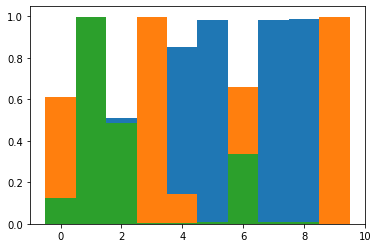

In [35]:
# for i,topic in enumerate(LDA.components_):
#     print(f'Top 10 words for topic #{i}:')
#     print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
#     print('\n')

topic_values = LDA.transform(doc_term_matrix)
# labels = range(len(topic_values))
labels = range(10)

fig, ax = plt.subplots()

ax.bar(labels, topic_values[:10,0], 1)
ax.bar(labels, topic_values[:10,1], 1)
ax.bar(labels, topic_values[:10,2], 1)
print(train_dataset.target[:10])

#### Very good! It was able to differentiate and classify the text of each group very well in these 10 first samples. It mostly has problems in separating class orange of class green, which are atheism and religion.

## References


- https://stackabuse.com/python-for-nlp-developing-an-automatic-text-filler-using-n-grams/
- https://www.kdnuggets.com/2019/09/overview-topics-extraction-python-latent-dirichlet-allocation.html
- 